In [58]:
import pandas as pd 
data = pd.read_csv("diabetes.csv")

data


In [61]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

🏥 What Is Symptom-Based Disease Prediction?
Symptom-based prediction means we use a person’s health data — like sugar level, blood pressure, or BMI — to estimate if they may have a disease like diabetes, thyroid, or heart disease.

Think of it like a health detective 🔍:
Instead of waiting for a test report, the model looks at clues (symptoms) and makes a smart guess.

🧠 Scientific Insight:
Diseases often show patterns in symptoms and body measurements.

For example:

A person with high glucose, high BMI, and age > 45 is statistically more likely to have diabetes.

A person with low blood pressure and normal BMI is more likely to be healthy.

📊 These measurements form the features of your ML model.

🤖 How Machine Learning Uses It
We use a K-Nearest Neighbors (KNN) model:

It finds other patients with similar symptoms<br>

It checks their diagnosis (disease or healthy)<br>

Based on that, it predicts the current patient’s condition ✅

✅ Summary:
Health data (like sugar, BP, BMI) = ML features

KNN checks for similar past patients

Prediction = Disease/No disease

Fast, smart, and very useful in medical diagnosis 💉



In [64]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
X= data.drop("Outcome",axis=1) # Features (symptoms)
y= data["Outcome"] # Target (1 = Diabetic, 0 = Healthy)

In [68]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<h5>Split into Train & Test</h5>

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h5>Train KNN Model</h5>

In [74]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)



KNeighborsClassifier()

In [76]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.6623376623376623


In [78]:
# Choose real patient example
new_patient = data.drop("Outcome", axis=1).iloc[[15]]  # row index 15
actual_result = data["Outcome"].iloc[15]

# Predict
result = model.predict(new_patient)

# Show prediction
print(" Real Patient Data:\n", new_patient)
print("Predicted:", "Diabetic" if result[0]==1 else "Healthy")
print("Actual Outcome:", "Diabetic" if actual_result==1 else "Healthy")


 Real Patient Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
15            7      100              0              0        0  30.0   

    DiabetesPedigreeFunction  Age  
15                     0.484   32  
Predicted: Healthy
Actual Outcome: Diabetic


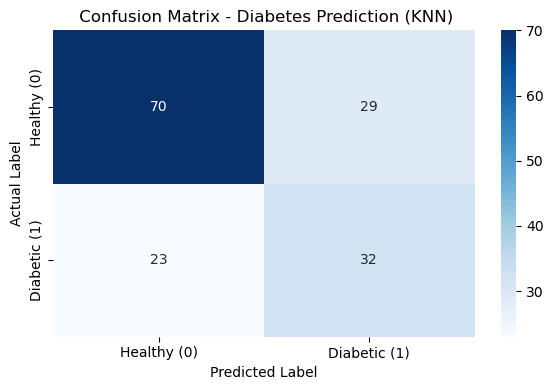

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy (0)", "Diabetic (1)"],
            yticklabels=["Healthy (0)", "Diabetic (1)"])
plt.title(" Confusion Matrix - Diabetes Prediction (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

📊 What This Heatmap Represents
This heatmap is a 2x2 matrix showing how your KNN model performed on the test data.

📘 Axis Explanation:
Axis	What It Represents
X-axis	What the model predicted (0 or 1)
Y-axis	What the actual (true) result was

🧠 Matrix Structure:
Actual / Predicted	Predicted 0 (Healthy)	Predicted 1 (Diabetic)
Actual 0 (Healthy)	🔷 True Negatives (TN)	🔶 False Positives (FP)
Actual 1 (Diabetic)	🔶 False Negatives (FN)	🔷 True Positives (TP)

✅ What Each Box in the Heatmap Means:
🔷 Box [0,0] = True Negatives (TN)
Model said Healthy

Actual was Healthy

✔️ Correct prediction

🔶 Box [0,1] = False Positives (FP)
Model said Diabetic

Actual was Healthy

❌ Wrong — model overestimated risk

🔶 Box [1,0] = False Negatives (FN)
Model said Healthy

Actual was Diabetic

❌ Very risky — disease missed

🔷 Box [1,1] = True Positives (TP)
Model said Diabetic

Actual was Diabetic

✔️ Correct prediction

🎨 Color Intensity:
Darker Blue = Higher number of predictions in that cell

Lighter Blue = Fewer cases in that category

It helps you visually spot where the model is:

Performing well (diagonal boxes)

Making mistakes (off-diagonal boxes)

🧪 Then the heatmap shows:

95 → Correctly predicted healthy (top-left box)

90 → Correctly predicted diabetic (bottom-right box)

5 → Wrongly called 5 healthy people diabetic (FP)

10 → Missed 10 actual diabetic patients (FN)

🏁 Summary
The heatmap represents how well your KNN model is predicting diabetes:

-Diagonal values (TN, TP) → ✅ Correct predictions

-Off-diagonal values (FP, FN) → ❌ Model’s mistakes